Importing Libraries


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

Uploading Dataset

In [46]:
df = pd.read_csv("/content/Student_performance_data_with_missing_values.csv")

In [47]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2.0,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1.0,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2.0,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3.0,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3.0,0,0,0,0,1.288061,4.0


In [48]:
df.tail()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
2387,3388,18,1,0,3,10.680555,2,0,4.0,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4.0,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,NaN,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2.0,0,1,1,0,1.803297,1.0
2391,3392,16,1,0,2,17.819907,13,0,2.0,0,0,0,1,2.140014,1.0


Handling Missing Values

In [49]:
import pandas as pd
df_missing = pd.read_csv("Student_performance_data_with_missing_values.csv")
print("Missing values before handling:\n", df_missing.isnull().sum())
if 'GPA' in df_missing.columns:
    df_missing['GPA'].fillna(df_missing['GPA'].mean(), inplace=True)
if 'ParentalSupport' in df_missing.columns:
    df_missing['ParentalSupport'].fillna(df_missing['ParentalSupport'].mode()[0], inplace=True)
if 'StudyTimeWeekly' in df_missing.columns:
    df_missing['StudyTimeWeekly'].fillna(df_missing['StudyTimeWeekly'].median(), inplace=True)
print("\nMissing values after handling:\n", df_missing.isnull().sum())

Missing values before handling:
 StudentID              0
Age                    0
Gender                 0
Ethnicity              0
ParentalEducation      0
StudyTimeWeekly      119
Absences               0
Tutoring               0
ParentalSupport      119
Extracurricular        0
Sports                 0
Music                  0
Volunteering           0
GPA                  119
GradeClass             0
dtype: int64

Missing values after handling:
 StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


<ipython-input-49-0fb9a2484c21>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_missing['GPA'].fillna(df_missing['GPA'].mean(), inplace=True)
<ipython-input-49-0fb9a2484c21>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Splitting the Datas as Input and Target Variable

In [51]:
X = df.drop(columns=['StudentID', 'GPA', 'GradeClass'])
y = df['GradeClass']

Splitting the Datas as Training data and Testing data

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fitting the datas into decision tree classifier model

In [53]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [54]:
X_train.shape, X_test.shape

((1913, 12), (479, 12))

Prediction, Accuracy score, Classification Report

In [55]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

In [56]:
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.6179540709812108

Classification Report:
               precision    recall  f1-score   support

         0.0       0.26      0.23      0.24        22
         1.0       0.39      0.45      0.42        49
         2.0       0.42      0.44      0.43        85
         3.0       0.47      0.48      0.47        86
         4.0       0.84      0.81      0.82       237

    accuracy                           0.62       479
   macro avg       0.48      0.48      0.48       479
weighted avg       0.63      0.62      0.62       479



Prediction with giving input values

In [57]:
grade = model.predict([[18, 1, 0, 3, 10.680555, 2, 0, 4, 1, 0, 0, 0]])
print(grade[0])

1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Predicting Pass, Fail

In [58]:
if grade in [1, 2]:
    print("Result: Pass")
elif grade in [3, 4]:
    print("Result: Fail")
else:
    print("Result: Unknown")

Result: Pass


Feature Corelation Heatmap

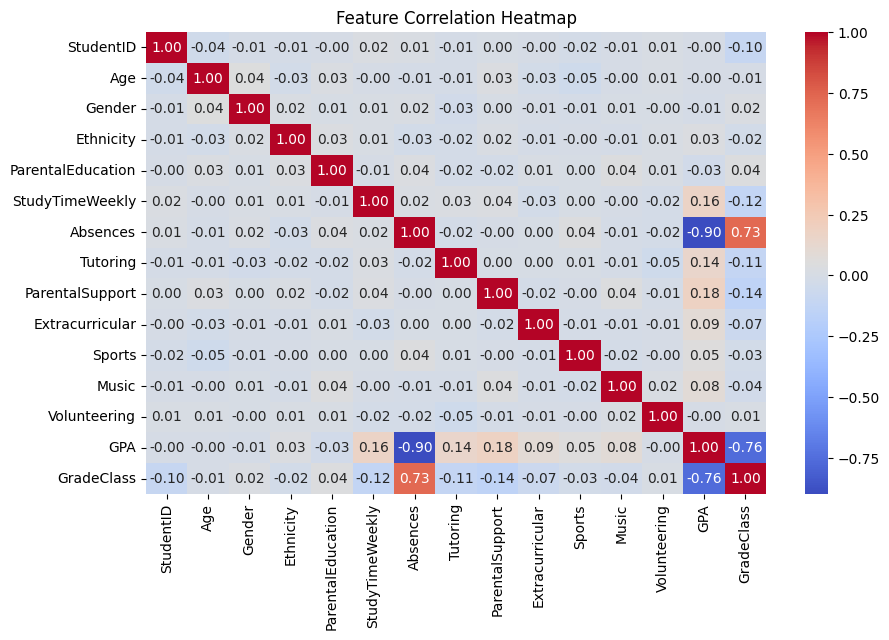

In [59]:
numeric_df = df.select_dtypes(include= ['float64' , 'int64'])
numeric_df.fillna(numeric_df.median(), inplace=True)
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()